In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import g_key

In [2]:
file = 'res/1_2.csv'
df = pd.read_csv(file)

file1 = 'res/3coord.csv'
df1 = pd.read_csv(file1)

file2 = 'res/4coord.csv'
df2 = pd.read_csv(file2)

file4 = 'res/5coord.csv'
df4 = pd.read_csv(file4)

file5 = 'res/6coord.csv'
df5 = pd.read_csv(file5)

file6 = 'res/7coord.csv'
df6 = pd.read_csv(file6)

file7 = 'res/8coord.csv'
df7 = pd.read_csv(file7)

file8 = 'res/9coord.csv'
df8 = pd.read_csv(file8)

file9 = 'res/10coord.csv'
df9 = pd.read_csv(file9)


In [3]:
new_df = pd.concat([df,df1,df2,df4,df5,df6,df7,df8,df9], join='outer')
new_df.head()
new_df = new_df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','region_2'])
new_df['year'] = new_df['title']


new_df.head()


,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,Lat,Lng,heat weights,year
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,41.387933,-7.276971,7,Quinta dos Avidagos 2011 Avidagos Red (Douro)
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,40.089829,-88.248177,7,Rainstorm 2013 Pinot Gris (Willamette Valley)
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,42.212252,-85.891725,7,St. Julian 2013 Reserve Late Harvest Riesling ...
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,42.343889,-71.101111,7,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,32.905753,-117.230246,7,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...


In [4]:
new_df['year'] = new_df['year'].str.extract('(\d+)')

In [5]:
new_df.to_csv('winedf2')

In [6]:
group_df = new_df.groupby(new_df['variety'])
group_mean = group_df.mean()
group_mean_price = group_mean.sort_values(by='price')
group_mean_points = group_mean.sort_values(by='points')
group_mean_price

,points,price,Lat,Lng,heat weights
variety,,,,,
Trajadura,86.000000,7.000000,41.207587,-8.308216,6.000000
Malagouzia-Chardonnay,86.000000,8.000000,37.225606,-95.716202,6.000000
Macabeo-Moscatel,85.000000,8.000000,39.929755,-3.012023,5.000000
Shiraz-Tempranillo,82.000000,8.500000,35.779821,-58.875590,2.000000
Johannisberg Riesling,86.250000,8.875000,42.743756,-108.887464,6.250000
...,...,...,...,...,...
Malbec-Cabernet,91.666667,113.333333,16.631590,-77.746702,11.666667
Rosenmuskateller,92.000000,150.000000,45.784283,-108.520048,12.000000
Francisa,91.000000,160.000000,21.538743,82.168644,11.000000


In [7]:
group_mean_points

,points,price,Lat,Lng,heat weights
variety,,,,,
Chancellor,80.500000,16.0,40.394104,-81.916138,0.500000
Airen,81.666667,9.0,41.538212,-2.911664,1.666667
Picapoll,82.000000,21.0,41.864185,1.972414,2.000000
Shiraz-Tempranillo,82.000000,8.5,35.779821,-58.875590,2.000000
Aidani,82.000000,27.0,43.679592,-114.362361,2.000000
...,...,...,...,...,...
Riesling-Chardonnay,94.000000,40.0,40.945028,-72.277470,14.000000
Bual,94.333333,100.0,38.144699,-86.890734,14.333333
Tinta del Pais,95.000000,47.5,42.029839,-37.711981,15.000000


In [8]:
group_pnt_df = new_df.groupby(new_df['points'])

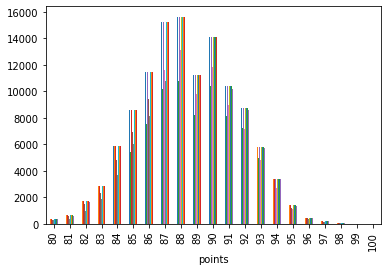

In [9]:
group_pnt = group_pnt_df.count()
group_pnt.plot(kind='bar',legend=False)

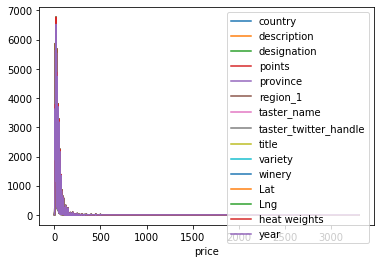

In [10]:
group_prc_df = new_df.groupby(new_df['price'])
group_price = group_prc_df.count()
group_price.plot()

In [ ]:
#base_url =f'http://climateapi.scottpinkelman.com/api/v1/location/{latitude}/{logintitude}'
    
#response = requests.get(base_url)
#print(response.url)
#places_data = response.json()
#places_data
for index, row in new_df.iterrows():
    latitute = row['Lat']
    logintitude = row['Lng']
    print(f"Retrieving Results for {row['winery']}.")
    base_url =f'http://climateapi.scottpinkelman.com/api/v1/location/{latitute}/{logintitude}'
    response = requests.get(base_url)
    print(response.url)
    
    try:
        places_data = response.json()
        #print(places_data)
        results = places_data['return_values'][0]
        #print(results)
        zone = results['koppen_geiger_zone']
        zone_desc = results['zone_description']
        print(zone)
        df.loc[index, 'Climate Zone'] = zone
        df.loc[index, 'Climate Zone Desc.'] = zone_desc
        
        
        
    except:
        print("Could not identify the Climate Zone.")

Retrieving Results for Quinta dos Avidagos.
http://climateapi.scottpinkelman.com/api/v1/location/41.3879331/-7.276971400000001
Csb
Retrieving Results for Rainstorm.
http://climateapi.scottpinkelman.com/api/v1/location/40.08982879999999/-88.2481766
Dfa
Retrieving Results for St. Julian.
http://climateapi.scottpinkelman.com/api/v1/location/42.21225219999999/-85.89172479999998
Dfa
Retrieving Results for Sweet Cheeks.
http://climateapi.scottpinkelman.com/api/v1/location/42.343888899999996/-71.1011111
Dfa
Retrieving Results for Tandem.
http://climateapi.scottpinkelman.com/api/v1/location/32.9057531/-117.2302457
BSk
Retrieving Results for Terre di Giurfo.
http://climateapi.scottpinkelman.com/api/v1/location/37.1112433/14.632728699999998
Csa
Retrieving Results for Trimbach.
http://climateapi.scottpinkelman.com/api/v1/location/48.1949046/7.3260159
Cfb
Retrieving Results for Heinz Eifel.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Jean-

Retrieving Results for Schmitt Söhne.
http://climateapi.scottpinkelman.com/api/v1/location/39.093810600000005/-76.63212209999998
Cfa
Retrieving Results for Yalumba.
http://climateapi.scottpinkelman.com/api/v1/location/-34.5131355/139.0565116
BSk
Retrieving Results for Z'IVO.
http://climateapi.scottpinkelman.com/api/v1/location/45.127568100000005/-123.1187881
Csb
Retrieving Results for Aresti.
http://climateapi.scottpinkelman.com/api/v1/location/32.470674/-97.559511
Cfa
Retrieving Results for Spyro.
http://climateapi.scottpinkelman.com/api/v1/location/41.0541667/-85.2261111
Dfa
Retrieving Results for Lionel Osmin & Cie.
http://climateapi.scottpinkelman.com/api/v1/location/43.326190000000004/-0.3296535
Cfb
Retrieving Results for Mitolo.
http://climateapi.scottpinkelman.com/api/v1/location/41.024063899999994/-80.61693100000001
Dfb
Retrieving Results for Napa Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/38.4212828/-122.3900237
Csb
Retrieving Results for P.J. Valckenberg.
h

http://climateapi.scottpinkelman.com/api/v1/location/49.638290000000005/8.36892
Cfb
Retrieving Results for Wrath.
http://climateapi.scottpinkelman.com/api/v1/location/36.40920699999999/-121.38520700000001
Csb
Retrieving Results for Yardstick.
http://climateapi.scottpinkelman.com/api/v1/location/37.371094/-121.925574
Csb
Retrieving Results for Herdade Grande.
http://climateapi.scottpinkelman.com/api/v1/location/38.1874922/-7.8383587000000015
Csa
Retrieving Results for Albatross Ridge.
http://climateapi.scottpinkelman.com/api/v1/location/36.4777986/-121.72905279999999
Csb
Retrieving Results for Alta Colina.
http://climateapi.scottpinkelman.com/api/v1/location/35.650182/-120.7449239
Csb
Retrieving Results for Big Basin.
http://climateapi.scottpinkelman.com/api/v1/location/37.171628399999996/-122.2227571
Csb
Retrieving Results for Carl Graff.
http://climateapi.scottpinkelman.com/api/v1/location/42.035688799999996/-87.77794990000001
Dfa
Retrieving Results for Casa Santa Vitória.
http://clim

http://climateapi.scottpinkelman.com/api/v1/location/42.65034199999999/-76.634433
Dfb
Retrieving Results for Benessere.
http://climateapi.scottpinkelman.com/api/v1/location/40.725963899999996/-74.37335829999998
Cfa
Retrieving Results for Bloomer Creek.
http://climateapi.scottpinkelman.com/api/v1/location/42.489662700000004/-76.8702328
Dfb
Retrieving Results for Andean Sky.
http://climateapi.scottpinkelman.com/api/v1/location/-21.1607667/-66.7752481
BSk
Retrieving Results for Angove's.
http://climateapi.scottpinkelman.com/api/v1/location/41.9747799/-79.12871679999998
Dfb
Retrieving Results for Silvan Ridge.
http://climateapi.scottpinkelman.com/api/v1/location/43.9569919/-123.26447979999999
Csb
Retrieving Results for Talamonti.
http://climateapi.scottpinkelman.com/api/v1/location/42.065576899999996/-87.68487009999998
Dfa
Retrieving Results for Testarossa.
http://climateapi.scottpinkelman.com/api/v1/location/37.21347799999999/-121.981544
Csb
Retrieving Results for Meeker.
http://climateap

http://climateapi.scottpinkelman.com/api/v1/location/39.131896999999995/-123.53260149999998
Csb
Retrieving Results for Cramele Recas.
http://climateapi.scottpinkelman.com/api/v1/location/45.7991938/21.505781600000002
Cfb
Retrieving Results for Domaine Bertagna.
http://climateapi.scottpinkelman.com/api/v1/location/47.175934399999996/4.963435899999999
Cfb
Retrieving Results for Domaine Sigalas.
http://climateapi.scottpinkelman.com/api/v1/location/36.471427/25.394178
Csa
Retrieving Results for Socré.
http://climateapi.scottpinkelman.com/api/v1/location/41.9176306/-87.6982833
Dfa
Retrieving Results for Boffa.
http://climateapi.scottpinkelman.com/api/v1/location/10.1808254/-14.039161499999999
Am
Retrieving Results for Otto's Constant Dream.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Mount Veeder.
http://climateapi.scottpinkelman.com/api/v1/location/38.3793566/-122.4477575
Csb
Retrieving Results for Robert Mondavi.
http://climateapi

Retrieving Results for Volpe Pasini.
http://climateapi.scottpinkelman.com/api/v1/location/46.11364289999999/13.3973476
Cfb
Retrieving Results for L.A. Cetto.
http://climateapi.scottpinkelman.com/api/v1/location/32.52413/-117.037761
BSk
Retrieving Results for La Vis.
http://climateapi.scottpinkelman.com/api/v1/location/46.1377955/11.107530800000001
Dfb
Retrieving Results for Lapostolle.
http://climateapi.scottpinkelman.com/api/v1/location/29.743232/-95.461971
Cfa
Retrieving Results for Carmen.
http://climateapi.scottpinkelman.com/api/v1/location/37.09024/-95.712891
Cfa
Retrieving Results for Tommasi.
http://climateapi.scottpinkelman.com/api/v1/location/30.162265/-93.18051190000001
Cfa
Retrieving Results for San Michele Eppan.
http://climateapi.scottpinkelman.com/api/v1/location/46.456076700000004/11.2623877
Dfb
Retrieving Results for Vinoce.
http://climateapi.scottpinkelman.com/api/v1/location/38.2859369/-122.2863383
Csb
Retrieving Results for Merriam.
http://climateapi.scottpinkelman.c

Retrieving Results for Bellavista.
http://climateapi.scottpinkelman.com/api/v1/location/41.2611026/1.2763153999999999
Csa
Retrieving Results for Chanoine.
http://climateapi.scottpinkelman.com/api/v1/location/46.77914670000001/-71.3019608
Dfb
Retrieving Results for Chehalem.
http://climateapi.scottpinkelman.com/api/v1/location/45.327896200000005/-122.88871
Csb
Retrieving Results for Chehalem.
http://climateapi.scottpinkelman.com/api/v1/location/45.327896200000005/-122.88871
Csb
Retrieving Results for Henri de Villamont.
http://climateapi.scottpinkelman.com/api/v1/location/47.0628625/4.8215919000000005
Cfb
Retrieving Results for Vollereaux.
http://climateapi.scottpinkelman.com/api/v1/location/49.0168021/3.9340045
Cfb
Retrieving Results for Wittmann.
http://climateapi.scottpinkelman.com/api/v1/location/33.776385600000005/-112.5282591
BSh
Retrieving Results for Valentina Cubi.
http://climateapi.scottpinkelman.com/api/v1/location/45.530744399999996/10.891579
Cfb
Retrieving Results for Domai

http://climateapi.scottpinkelman.com/api/v1/location/45.272490000000005/-123.01619109999999
Csb
Retrieving Results for Le Cadeau.
http://climateapi.scottpinkelman.com/api/v1/location/45.272490000000005/-123.01619109999999
Csb
Retrieving Results for Le Vigne.
http://climateapi.scottpinkelman.com/api/v1/location/35.67438129999999/-120.6591659
Csb
Retrieving Results for Maximin Grünhäuser.
http://climateapi.scottpinkelman.com/api/v1/location/49.769319/6.71639
Cfb
Retrieving Results for Northstar.
http://climateapi.scottpinkelman.com/api/v1/location/39.27456779999999/-120.1210934
Csb
Retrieving Results for Padis.
http://climateapi.scottpinkelman.com/api/v1/location/37.7719769/-122.4050479
Csb
Retrieving Results for Paul O'Brien.
http://climateapi.scottpinkelman.com/api/v1/location/39.6382383/-84.2187043
Cfa
Retrieving Results for Claiborne & Churchill.
http://climateapi.scottpinkelman.com/api/v1/location/35.1981121/-120.6051883
Csb
Retrieving Results for Flying Goat Cellars.
http://climate

Retrieving Results for Peconic Bay Winery.
http://climateapi.scottpinkelman.com/api/v1/location/41.018927000000005/-72.47964999999998
Cfb
Retrieving Results for Príncipe de Viana.
http://climateapi.scottpinkelman.com/api/v1/location/42.0362912/-1.6496407
Cfa
Retrieving Results for Proemio.
http://climateapi.scottpinkelman.com/api/v1/location/-32.8894587/-68.8458386
BWk
Retrieving Results for Quady North.
http://climateapi.scottpinkelman.com/api/v1/location/42.313854/-122.96598600000002
Csb
Retrieving Results for Quady North.
http://climateapi.scottpinkelman.com/api/v1/location/42.313854/-122.96598600000002
Csb
Retrieving Results for Quinta do Portal.
http://climateapi.scottpinkelman.com/api/v1/location/41.240301/-7.568666500000001
Csb
Retrieving Results for Raptor Ridge.
http://climateapi.scottpinkelman.com/api/v1/location/45.385228600000005/-122.94920069999999
Csb
Retrieving Results for Rodney Strong.
http://climateapi.scottpinkelman.com/api/v1/location/38.573286100000004/-122.8439611

http://climateapi.scottpinkelman.com/api/v1/location/38.285684/-122.32316100000001
Csb
Retrieving Results for Acacia.
http://climateapi.scottpinkelman.com/api/v1/location/37.138872/-93.2374437
Cfa
Retrieving Results for Array.
http://climateapi.scottpinkelman.com/api/v1/location/30.232665500000003/-97.73174509999998
Cfa
Retrieving Results for Baracchi Riccardo.
http://climateapi.scottpinkelman.com/api/v1/location/43.27506340000001/11.98512
Cfb
Retrieving Results for Baracchi Riccardo.
http://climateapi.scottpinkelman.com/api/v1/location/43.27506340000001/11.98512
Cfb
Retrieving Results for Barrister.
http://climateapi.scottpinkelman.com/api/v1/location/36.8731822/-94.8762
Cfa
Retrieving Results for Bodegas Berceo.
http://climateapi.scottpinkelman.com/api/v1/location/42.5757936/-2.8466713
Cfb
Retrieving Results for Bunnell.
http://climateapi.scottpinkelman.com/api/v1/location/29.4660863/-81.25784159999998
Cfa
Retrieving Results for Castello di Neive.
http://climateapi.scottpinkelman.com

http://climateapi.scottpinkelman.com/api/v1/location/29.883273/-98.221328
Cfa
Retrieving Results for William Knuttel.
http://climateapi.scottpinkelman.com/api/v1/location/38.2598449/-122.43670490000001
Csb
Retrieving Results for Casa Larga.
http://climateapi.scottpinkelman.com/api/v1/location/43.051453/-77.432665
Dfb
Retrieving Results for Cave de Beblenheim.
http://climateapi.scottpinkelman.com/api/v1/location/48.15898070000001/7.3268589
Cfb
Retrieving Results for De Loach.
http://climateapi.scottpinkelman.com/api/v1/location/38.46248610000001/-122.82000829999998
Csb
Retrieving Results for De Martino.
http://climateapi.scottpinkelman.com/api/v1/location/39.958604799999996/-74.2125623
Cfa
Retrieving Results for Center of Effort.
http://climateapi.scottpinkelman.com/api/v1/location/35.188295000000004/-120.585784
Csb
Retrieving Results for El Coto.
http://climateapi.scottpinkelman.com/api/v1/location/20.397222199999998/-100.1361111
Cwb
Retrieving Results for Handley.
http://climateapi.sc

http://climateapi.scottpinkelman.com/api/v1/location/37.594345399999995/-122.505546
Csb
Retrieving Results for Les Vins Aujoux.
http://climateapi.scottpinkelman.com/api/v1/location/46.189132799999996/4.7007762999999985
Cfb
Retrieving Results for Navardia.
http://climateapi.scottpinkelman.com/api/v1/location/42.287073299999996/-2.539603
Cfb
Retrieving Results for Pata Negra.
http://climateapi.scottpinkelman.com/api/v1/location/32.799971500000005/-117.23942749999999
BSk
Retrieving Results for Ridolfi.
http://climateapi.scottpinkelman.com/api/v1/location/47.610062/-122.33454569999999
Csb
Retrieving Results for Still Waters.
http://climateapi.scottpinkelman.com/api/v1/location/36.6378713/-93.3449275
Cfa
Retrieving Results for Stomping Ground.
http://climateapi.scottpinkelman.com/api/v1/location/32.798337599999996/-96.8283824
Cfa
Retrieving Results for Tenuta Poggio il Castellare.
http://climateapi.scottpinkelman.com/api/v1/location/43.1010849/11.544642999999999
Cfb
Retrieving Results for T

Retrieving Results for Leonesse Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/33.5239087/-117.01846670000002
Csa
Retrieving Results for Market Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/47.733965999999995/-122.14135390000001
Csb
Retrieving Results for Mazzei.
http://climateapi.scottpinkelman.com/api/v1/location/35.350621999999994/-118.91887
BSk
Retrieving Results for Morlanda.
http://climateapi.scottpinkelman.com/api/v1/location/41.1403743/0.7981043999999999
Csa
Retrieving Results for Quinta do Vallado.
http://climateapi.scottpinkelman.com/api/v1/location/41.162005/-7.766782000000001
Csb
Retrieving Results for Becker.
http://climateapi.scottpinkelman.com/api/v1/location/45.3936545/-93.87650759999998
Dfb
Retrieving Results for Bex.
http://climateapi.scottpinkelman.com/api/v1/location/38.782948/-90.492953
Cfa
Retrieving Results for Boffa.
http://climateapi.scottpinkelman.com/api/v1/location/10.1808254/-14.039161499999999
Am
Retrieving Results for Bren

http://climateapi.scottpinkelman.com/api/v1/location/32.796498/-117.256629
BSk
Retrieving Results for Santa Ema.
http://climateapi.scottpinkelman.com/api/v1/location/32.4934795/-116.9598656
BSk
Retrieving Results for Morandé.
http://climateapi.scottpinkelman.com/api/v1/location/41.8593215/-72.3567338
Dfb
Retrieving Results for One Hope.
http://climateapi.scottpinkelman.com/api/v1/location/26.2254675/-80.1350375
Am
Retrieving Results for Pommery.
http://climateapi.scottpinkelman.com/api/v1/location/30.2034756/-92.0168981
Cfa
Retrieving Results for Saddleback.
http://climateapi.scottpinkelman.com/api/v1/location/33.5540319/-117.66411210000001
Csa
Retrieving Results for Alexander Valley Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/38.656490000000005/-122.78690700000001
Csb
Retrieving Results for Covington.
http://climateapi.scottpinkelman.com/api/v1/location/39.083671200000005/-84.5085536
Cfa
Retrieving Results for Feudo Montoni.
http://climateapi.scottpinkelman.com/api

http://climateapi.scottpinkelman.com/api/v1/location/45.918459999999996/13.47841
Cfa
Retrieving Results for Honeywood Winery.
http://climateapi.scottpinkelman.com/api/v1/location/44.9262902/-123.028373
Csb
Retrieving Results for I Clivi.
http://climateapi.scottpinkelman.com/api/v1/location/45.9991961/13.456980999999999
Cfa
Retrieving Results for Irony.
http://climateapi.scottpinkelman.com/api/v1/location/38.502468900000004/-122.26538870000002
Csb
Retrieving Results for Little Black Dress.
http://climateapi.scottpinkelman.com/api/v1/location/37.2246751/-95.7418099
Cfa
Retrieving Results for Marqués de Vizhoja.
http://climateapi.scottpinkelman.com/api/v1/location/42.133261700000006/-8.262402499999999
Csb
Retrieving Results for Estancia.
http://climateapi.scottpinkelman.com/api/v1/location/32.8842343/-117.2445404
BSk
Retrieving Results for Finca La Emperatriz.
http://climateapi.scottpinkelman.com/api/v1/location/42.496479/-2.941563
Cfb
Retrieving Results for Vinai dell'Abbate.
http://clim

http://climateapi.scottpinkelman.com/api/v1/location/43.9813845/0.43167079999999997
Cfb
Retrieving Results for Domaine Rolet Père et Fils.
http://climateapi.scottpinkelman.com/api/v1/location/46.9026477/5.772553500000001
Cfb
Retrieving Results for Three Brothers.
http://climateapi.scottpinkelman.com/api/v1/location/38.9448454/-76.93144720000001
Cfa
Retrieving Results for Wilridge.
http://climateapi.scottpinkelman.com/api/v1/location/46.6244186/-120.62684070000002
Csb
Retrieving Results for Wilridge.
http://climateapi.scottpinkelman.com/api/v1/location/46.6244186/-120.62684070000002
Csb
Retrieving Results for Belden Barns.
http://climateapi.scottpinkelman.com/api/v1/location/38.367125/-122.604111
Csb
Retrieving Results for Château du Retout.
http://climateapi.scottpinkelman.com/api/v1/location/45.1013736/-0.7269958999999999
Cfb
Retrieving Results for Château la Gravette Lacombe.
http://climateapi.scottpinkelman.com/api/v1/location/44.556862/-0.038418
Cfb
Retrieving Results for Apaltagua

http://climateapi.scottpinkelman.com/api/v1/location/43.5686384/-0.11887550000000001
Cfb
Retrieving Results for Finca Lalande.
http://climateapi.scottpinkelman.com/api/v1/location/-32.8894587/-68.8458386
BWk
Retrieving Results for Altos Las Hormigas.
http://climateapi.scottpinkelman.com/api/v1/location/-32.8894587/-68.8458386
BWk
Retrieving Results for Antucura.
http://climateapi.scottpinkelman.com/api/v1/location/-33.66436470000001/-69.1349343
Cfb
Retrieving Results for Aubichon Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/45.2725028/-123.0161155
Csb
Retrieving Results for Battaglio.
http://climateapi.scottpinkelman.com/api/v1/location/44.723261799999996/8.0835572
Cfb
Retrieving Results for Ben Haines.
http://climateapi.scottpinkelman.com/api/v1/location/-36.3637012/145.4045256
Cfa
Retrieving Results for Beresford.
http://climateapi.scottpinkelman.com/api/v1/location/43.080544599999996/-96.773655
Dfa
Retrieving Results for Blue Fish.
http://climateapi.scottpinkelman.c

http://climateapi.scottpinkelman.com/api/v1/location/38.4890768/-122.73537240000002
Csb
Retrieving Results for Barkan.
http://climateapi.scottpinkelman.com/api/v1/location/26.154961/-80.11703100000001
Am
Retrieving Results for Black Star Farms.
http://climateapi.scottpinkelman.com/api/v1/location/44.9338/-85.63609699999998
Dfb
Retrieving Results for Cosentino.
http://climateapi.scottpinkelman.com/api/v1/location/38.944951200000006/-94.7661838
Cfa
Retrieving Results for Cusumano.
http://climateapi.scottpinkelman.com/api/v1/location/38.6154898/-90.3118787
Cfa
Retrieving Results for Lusco.
http://climateapi.scottpinkelman.com/api/v1/location/40.0343281/-86.0180566
Dfa
Retrieving Results for Markham.
http://climateapi.scottpinkelman.com/api/v1/location/43.8561002/-79.3370188
Dfb
Retrieving Results for Michael David.
http://climateapi.scottpinkelman.com/api/v1/location/38.1157776/-121.37193070000001
Csa
Retrieving Results for La Merika.
http://climateapi.scottpinkelman.com/api/v1/location/3

http://climateapi.scottpinkelman.com/api/v1/location/36.790386100000006/-95.935585
Cfa
Retrieving Results for Di Meo.
http://climateapi.scottpinkelman.com/api/v1/location/40.788577000000004/-73.640243
Cfa
Retrieving Results for Domaine Clos Gautier.
http://climateapi.scottpinkelman.com/api/v1/location/43.457215000000005/6.164358999999999
Csa
Retrieving Results for Domaine Harmonie des Arpents.
http://climateapi.scottpinkelman.com/api/v1/location/43.393839/6.040746400000001
Csa
Retrieving Results for Domaine Sainte-Marie.
http://climateapi.scottpinkelman.com/api/v1/location/47.18500710000001/-70.822339
Dfb
Retrieving Results for Domäne Wachau.
http://climateapi.scottpinkelman.com/api/v1/location/48.3920656/15.5273111
Cfb
Retrieving Results for Doren.
http://climateapi.scottpinkelman.com/api/v1/location/47.492554999999996/9.8801349
Cfb
Retrieving Results for Écluse.
http://climateapi.scottpinkelman.com/api/v1/location/45.8645005/-73.14483109999998
Dfb
Retrieving Results for Feudo Montoni

http://climateapi.scottpinkelman.com/api/v1/location/41.162005/-7.766782000000001
Csb
Retrieving Results for Quinta dos Murças.
http://climateapi.scottpinkelman.com/api/v1/location/41.153004100000004/-7.6881314
Csb
Retrieving Results for Replica.
http://climateapi.scottpinkelman.com/api/v1/location/37.004257700000004/-94.4428753
Cfa
Retrieving Results for Domaine Weinbach.
http://climateapi.scottpinkelman.com/api/v1/location/48.136239399999994/7.273184000000001
Cfb
Retrieving Results for Domaines Schlumberger.
http://climateapi.scottpinkelman.com/api/v1/location/47.91208899999999/7.2063039999999985
Cfb
Retrieving Results for Dry Creek Vineyard.
http://climateapi.scottpinkelman.com/api/v1/location/38.65291/-122.924876
Csb
Retrieving Results for Dunham.
http://climateapi.scottpinkelman.com/api/v1/location/36.715938799999996/-95.9332106
Cfa
Retrieving Results for Tamarack Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/46.091323200000005/-118.2721807
Csa
Retrieving Results f

http://climateapi.scottpinkelman.com/api/v1/location/45.7849627/-93.5569028
Dfb
Retrieving Results for Carneros Creek.
http://climateapi.scottpinkelman.com/api/v1/location/38.2213055/-122.31191820000001
Csb
Retrieving Results for Casale Triocco.
http://climateapi.scottpinkelman.com/api/v1/location/43.542927299999995/11.1721741
Cfb
Retrieving Results for Castello di Monastero.
http://climateapi.scottpinkelman.com/api/v1/location/43.3408601/11.5166459
Cfb
Retrieving Results for Konrad.
http://climateapi.scottpinkelman.com/api/v1/location/44.0165732/-88.53282109999998
Dfb
Retrieving Results for Lungarotti.
http://climateapi.scottpinkelman.com/api/v1/location/43.0298886/12.4289901
Cfb
Retrieving Results for Mana.
http://climateapi.scottpinkelman.com/api/v1/location/36.3010669/-94.1899455
Cfa
Retrieving Results for Robert Hall.
http://climateapi.scottpinkelman.com/api/v1/location/35.6438088/-120.63351709999999
Csb
Retrieving Results for Rubissow.
http://climateapi.scottpinkelman.com/api/v1/

http://climateapi.scottpinkelman.com/api/v1/location/45.03684129999999/-0.6694226
Cfb
Retrieving Results for Pirouette.
http://climateapi.scottpinkelman.com/api/v1/location/45.579275200000005/-73.8129548
Dfb
Retrieving Results for Marchesi Antinori.
http://climateapi.scottpinkelman.com/api/v1/location/43.6153804/11.1919579
Cfb
Retrieving Results for Château Troplong Mondot.
http://climateapi.scottpinkelman.com/api/v1/location/44.888576/-0.141231
Cfb
Retrieving Results for Tenuta San Guido.
http://climateapi.scottpinkelman.com/api/v1/location/43.226063/10.564736
Csa
Retrieving Results for Tenuta dell'Ornellaia.
http://climateapi.scottpinkelman.com/api/v1/location/43.23367639999999/10.617013900000002
Csa
Retrieving Results for JCB.
http://climateapi.scottpinkelman.com/api/v1/location/32.121312599999996/-81.2352051
Cfa
Retrieving Results for Château La Mission Haut-Brion.
http://climateapi.scottpinkelman.com/api/v1/location/44.815180700000006/-0.6052022
Cfb
Retrieving Results for Williams

http://climateapi.scottpinkelman.com/api/v1/location/38.832124900000004/-94.6657027
Cfa
Retrieving Results for Vinadeis.
http://climateapi.scottpinkelman.com/api/v1/location/43.1494785/2.9516769
Csb
Retrieving Results for Wines & Winemakers.
http://climateapi.scottpinkelman.com/api/v1/location/41.0468243/-72.4617987
Cfb
Retrieving Results for Zolo.
http://climateapi.scottpinkelman.com/api/v1/location/43.7358325/-79.347512
Dfb
Retrieving Results for Gnarly Head.
http://climateapi.scottpinkelman.com/api/v1/location/37.8550135/-121.2193385
Csa
Retrieving Results for Jacob's Creek.
http://climateapi.scottpinkelman.com/api/v1/location/29.883273/-98.221328
Cfa
Retrieving Results for Ca' Momi.
http://climateapi.scottpinkelman.com/api/v1/location/38.298506200000006/-122.2866085
Csb
Retrieving Results for Domaine de Reuilly.
http://climateapi.scottpinkelman.com/api/v1/location/47.0801536/2.0427296999999998
Cfb
Retrieving Results for Enoport.
http://climateapi.scottpinkelman.com/api/v1/location/

http://climateapi.scottpinkelman.com/api/v1/location/30.903428/34.396679
BWh
Retrieving Results for Antonino Tringali-Casanuova.
http://climateapi.scottpinkelman.com/api/v1/location/32.3703722/-110.9669111
BSh
Retrieving Results for Tyrrell's.
http://climateapi.scottpinkelman.com/api/v1/location/40.99135379999999/-74.03214179999998
Cfa
Retrieving Results for Vasse River.
http://climateapi.scottpinkelman.com/api/v1/location/-33.9610465/115.0767388
Csb
Retrieving Results for Vega de la Reina.
http://climateapi.scottpinkelman.com/api/v1/location/41.410874299999996/-4.9597660999999995
Csb
Retrieving Results for Villa Vignamaggio.
http://climateapi.scottpinkelman.com/api/v1/location/32.3703722/-110.9669111
BSh
Retrieving Results for Vinum Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/38.222947/-122.26304820000001
Csb
Retrieving Results for Analivia.
http://climateapi.scottpinkelman.com/api/v1/location/41.410874299999996/-4.9597660999999995
Csb
Retrieving Results for Battle o

http://climateapi.scottpinkelman.com/api/v1/location/43.60491/-116.82175
BSk
Retrieving Results for Krutz.
http://climateapi.scottpinkelman.com/api/v1/location/39.032432/-94.69511990000001
Cfa
Retrieving Results for Loring Wine Company.
http://climateapi.scottpinkelman.com/api/v1/location/34.6144876/-120.19940829999999
Csb
Retrieving Results for Loring Wine Company.
http://climateapi.scottpinkelman.com/api/v1/location/34.6144876/-120.19940829999999
Csb
Retrieving Results for Manzoni.
http://climateapi.scottpinkelman.com/api/v1/location/36.4722855/-121.4676372
Csb
Retrieving Results for Amavi.
http://climateapi.scottpinkelman.com/api/v1/location/46.01615049999999/-118.38378490000002
Csa
Retrieving Results for Bouchaine.
http://climateapi.scottpinkelman.com/api/v1/location/38.2264234/-122.3313172
Csb
Retrieving Results for Bucher.
http://climateapi.scottpinkelman.com/api/v1/location/38.895438/-94.7799375
Cfa
Retrieving Results for Syncline.
http://climateapi.scottpinkelman.com/api/v1/loc

In [ ]:
new_df.to_csv('winedf_loc_cz2.csv')
